In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/gulce/ANT-Theano-2-27/additional_resources/datasets/NYC Motor Vehicle Crashes/data_100000.csv')

In [4]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2017-04-18T00:00:00.000,23:10,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,...,Unspecified,NaN,NaN,NaN,3654181,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2017-05-06T00:00:00.000,13:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,...,NaN,NaN,NaN,NaN,3665311,Sedan,NaN,NaN,NaN,NaN
2,2017-04-27T00:00:00.000,17:15,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3658491,Sedan,Sedan,NaN,NaN,NaN
3,2017-05-09T00:00:00.000,20:10,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3666554,Motorcycle,Sedan,Bus,NaN,NaN
4,2017-04-18T00:00:00.000,14:00,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,...,Unspecified,NaN,NaN,NaN,3653269,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [5]:
df.shape

(100000, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     100000 non-null  object 
 1   crash_time                     100000 non-null  object 
 2   borough                        64974 non-null   object 
 3   zip_code                       64966 non-null   float64
 4   latitude                       91965 non-null   float64
 5   longitude                      91965 non-null   float64
 6   location                       91965 non-null   object 
 7   on_street_name                 73991 non-null   object 
 8   off_street_name                47125 non-null   object 
 9   cross_street_name              25967 non-null   object 
 10  number_of_persons_injured      100000 non-null  int64  
 11  number_of_persons_killed       100000 non-null  int64  
 12  number_of_pedestrians_injured  

In [7]:
relevant_df = df.iloc[:, 2:18]

In [8]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   borough                        64974 non-null   object 
 1   zip_code                       64966 non-null   float64
 2   latitude                       91965 non-null   float64
 3   longitude                      91965 non-null   float64
 4   location                       91965 non-null   object 
 5   on_street_name                 73991 non-null   object 
 6   off_street_name                47125 non-null   object 
 7   cross_street_name              25967 non-null   object 
 8   number_of_persons_injured      100000 non-null  int64  
 9   number_of_persons_killed       100000 non-null  int64  
 10  number_of_pedestrians_injured  100000 non-null  int64  
 11  number_of_pedestrians_killed   100000 non-null  int64  
 12  number_of_cyclist_injured      

In [9]:
relevant_df.duplicated().any()

True

In [10]:
a = relevant_df.drop_duplicates()

In [11]:
a

,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,0,0,0,0,0,0,0
1,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,0,1,0,0,0,0,0
2,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,0,0,0,0,0,0,0
3,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,0,0,0,0,0,1,0
4,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,BROOKLYN,11210.0,40.618893,-73.946420,"(40.618893, -73.94642)",NaN,NaN,1314 EAST 29 STREET,0,0,0,0,0,0,0,0
99996,QUEENS,11367.0,40.723380,-73.814750,"(40.72338, -73.81475)",NaN,NaN,150-62 76 ROAD,0,0,0,0,0,0,0,0
99997,BROOKLYN,11249.0,40.710820,-73.968530,"(40.71082, -73.96853)",BROADWAY,KENT AVENUE,NaN,0,0,0,0,0,0,0,0
99998,BROOKLYN,11234.0,40.631180,-73.928185,"(40.63118, -73.928185)",NaN,NaN,1695 UTICA AVENUE,0,0,0,0,0,0,0,0


In [12]:
a.shape

(73880, 16)

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73880 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        52411 non-null  object 
 1   zip_code                       52403 non-null  float64
 2   latitude                       69993 non-null  float64
 3   longitude                      69993 non-null  float64
 4   location                       69993 non-null  object 
 5   on_street_name                 50140 non-null  object 
 6   off_street_name                34133 non-null  object 
 7   cross_street_name              23709 non-null  object 
 8   number_of_persons_injured      73880 non-null  int64  
 9   number_of_persons_killed       73880 non-null  int64  
 10  number_of_pedestrians_injured  73880 non-null  int64  
 11  number_of_pedestrians_killed   73880 non-null  int64  
 12  number_of_cyclist_injured      73880 non-null 

In [14]:
df_with_street = a.dropna(subset=['location', 'on_street_name', 'off_street_name', 'cross_street_name'], how='all')

In [15]:
df_with_street

,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,0,0,0,0,0,0,0
1,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,0,1,0,0,0,0,0
2,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,0,0,0,0,0,0,0
3,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,0,0,0,0,0,1,0
4,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,BROOKLYN,11210.0,40.618893,-73.946420,"(40.618893, -73.94642)",NaN,NaN,1314 EAST 29 STREET,0,0,0,0,0,0,0,0
99996,QUEENS,11367.0,40.723380,-73.814750,"(40.72338, -73.81475)",NaN,NaN,150-62 76 ROAD,0,0,0,0,0,0,0,0
99997,BROOKLYN,11249.0,40.710820,-73.968530,"(40.71082, -73.96853)",BROADWAY,KENT AVENUE,NaN,0,0,0,0,0,0,0,0
99998,BROOKLYN,11234.0,40.631180,-73.928185,"(40.63118, -73.928185)",NaN,NaN,1695 UTICA AVENUE,0,0,0,0,0,0,0,0


In [16]:
df_with_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73878 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        52411 non-null  object 
 1   zip_code                       52403 non-null  float64
 2   latitude                       69993 non-null  float64
 3   longitude                      69993 non-null  float64
 4   location                       69993 non-null  object 
 5   on_street_name                 50140 non-null  object 
 6   off_street_name                34133 non-null  object 
 7   cross_street_name              23709 non-null  object 
 8   number_of_persons_injured      73878 non-null  int64  
 9   number_of_persons_killed       73878 non-null  int64  
 10  number_of_pedestrians_injured  73878 non-null  int64  
 11  number_of_pedestrians_killed   73878 non-null  int64  
 12  number_of_cyclist_injured      73878 non-null 

In [17]:
df_with_street.reset_index()

,index,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,0,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,0,0,0,0,0,0,0
1,1,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,0,1,0,0,0,0,0
2,2,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,0,0,0,0,0,0,0
3,3,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,0,0,0,0,0,1,0
4,4,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73873,99995,BROOKLYN,11210.0,40.618893,-73.946420,"(40.618893, -73.94642)",NaN,NaN,1314 EAST 29 STREET,0,0,0,0,0,0,0,0
73874,99996,QUEENS,11367.0,40.723380,-73.814750,"(40.72338, -73.81475)",NaN,NaN,150-62 76 ROAD,0,0,0,0,0,0,0,0
73875,99997,BROOKLYN,11249.0,40.710820,-73.968530,"(40.71082, -73.96853)",BROADWAY,KENT AVENUE,NaN,0,0,0,0,0,0,0,0
73876,99998,BROOKLYN,11234.0,40.631180,-73.928185,"(40.63118, -73.928185)",NaN,NaN,1695 UTICA AVENUE,0,0,0,0,0,0,0,0


In [18]:
df_by_on_street = relevant_df.groupby(relevant_df['on_street_name']).sum()

In [19]:
df_by_on_street

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
on_street_name,,,,,,,,,,,
1 AVENUE,1792874.0,11535.499583,-20930.720805,112,0,24,0,50,0,38,0
1 PLACE,78617.0,284.762894,-517.980730,2,0,0,0,0,0,2,0
1 STREET,45290.0,162.623393,-295.449620,0,0,0,0,0,0,0,0
1 avenue,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
10 AVENUE,1347980.0,7133.584019,-12946.663105,46,0,8,0,10,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...
west 74 st,10023.0,0.000000,0.000000,0,0,0,0,0,0,0,0
west end ave,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
west street,30026.0,0.000000,0.000000,1,0,0,0,1,0,0,0


In [20]:
df_by_on_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4327 entries, 1 AVENUE                         to willis ave bridge               
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zip_code                       4327 non-null   float64
 1   latitude                       4327 non-null   float64
 2   longitude                      4327 non-null   float64
 3   number_of_persons_injured      4327 non-null   int64  
 4   number_of_persons_killed       4327 non-null   int64  
 5   number_of_pedestrians_injured  4327 non-null   int64  
 6   number_of_pedestrians_killed   4327 non-null   int64  
 7   number_of_cyclist_injured      4327 non-null   int64  
 8   number_of_cyclist_killed       4327 non-null   int64  
 9   number_of_motorist_injured     4327 non-null   int64  
 10  number_of_motorist_killed      4327 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 405.7+ KB


In [21]:
df_by_off_street = relevant_df.groupby(relevant_df['off_street_name']).sum()

In [22]:
df_by_off_street

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
off_street_name,,,,,,,,,,,
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
1 AVENUE,2260866.0,9456.678716,-17158.632509,86,0,16,0,28,0,42,0
1 PLACE,65208.0,244.133091,-444.022320,2,0,0,0,0,0,2,0
1 STREET,102064.0,406.598164,-738.171629,5,0,2,0,2,0,1,0
10,0.0,0.000000,0.000000,2,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
west 84 st west 85 st,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
west 92,10025.0,0.000000,0.000000,0,0,0,0,0,0,0,0
west street,10014.0,0.000000,0.000000,0,0,0,0,0,0,0,0


In [23]:
df_by_off_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4897 entries, 0 to woodrow road
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zip_code                       4897 non-null   float64
 1   latitude                       4897 non-null   float64
 2   longitude                      4897 non-null   float64
 3   number_of_persons_injured      4897 non-null   int64  
 4   number_of_persons_killed       4897 non-null   int64  
 5   number_of_pedestrians_injured  4897 non-null   int64  
 6   number_of_pedestrians_killed   4897 non-null   int64  
 7   number_of_cyclist_injured      4897 non-null   int64  
 8   number_of_cyclist_killed       4897 non-null   int64  
 9   number_of_motorist_injured     4897 non-null   int64  
 10  number_of_motorist_killed      4897 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 459.1+ KB


In [24]:
df_by_on_street.sort_values(['number_of_persons_injured'], ascending=False)

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
on_street_name,,,,,,,,,,,
BELT PARKWAY,284948.0,59117.941948,-107503.612858,935,5,4,1,1,0,930,4
GRAND CENTRAL PKWY,34230.0,32468.462463,-58835.647575,472,2,3,0,0,0,469,2
BROOKLYN QUEENS EXPRESSWAY,68096.0,36189.325898,-65750.251742,448,3,0,1,0,0,448,2
LONG ISLAND EXPRESSWAY,226355.0,40740.218065,-73832.083814,427,2,1,1,0,0,426,1
FDR DRIVE,220764.0,32486.276728,-58942.967068,388,2,2,1,0,0,386,1
...,...,...,...,...,...,...,...,...,...,...,...
Pennsylvania Ave,11234.0,0.000000,0.000000,0,0,0,0,0,0,0,0
GOLD ROAD,11417.0,40.674870,-73.846360,0,0,0,0,0,0,0,0
GOODWIN PLACE,0.0,40.692196,-73.924880,0,0,0,0,0,0,0,0


In [25]:
df_by_on_street.sort_values(['number_of_persons_killed'], ascending=False)

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
on_street_name,,,,,,,,,,,
HENRY HUDSON PARKWAY,20495.0,13842.177172,-25069.636820,149,6,0,0,1,0,148,6
BELT PARKWAY,284948.0,59117.941948,-107503.612858,935,5,4,1,1,0,930,4
ROCKAWAY BOULEVARD,2068386.0,9638.292510,-17489.698382,137,4,11,1,5,0,121,3
CROSS ISLAND PARKWAY,284872.0,21351.536877,-38645.661272,253,4,3,0,1,0,249,4
BRUCKNER BOULEVARD,2876112.0,21020.386283,-38053.810598,185,4,9,0,10,1,166,3
...,...,...,...,...,...,...,...,...,...,...,...
DEWITT PLACE,20938.0,122.602951,-221.541844,0,0,0,0,0,0,0,0
DEXTER COURT,22842.0,81.382630,-147.734440,1,0,0,0,1,0,0,0
DIAMOND STREET,0.0,40.725160,-73.946600,0,0,0,0,0,0,0,0


In [26]:
df_by_off_street.sort_values(['number_of_persons_injured'], ascending=False)

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
off_street_name,,,,,,,,,,,
BROADWAY,3946867.0,16922.990220,-30688.249934,158,0,36,0,32,0,90,0
3 AVENUE,3851660.0,16994.319983,-30840.986414,157,0,22,0,36,0,99,0
LINDEN BOULEVARD,2419323.0,9557.866676,-17353.762064,145,1,10,0,11,0,124,1
ATLANTIC AVENUE,2422225.0,9356.971914,-16999.035212,113,0,3,0,20,0,90,0
2 AVENUE,3407667.0,13815.478420,-25074.432706,111,0,21,0,22,0,68,0
...,...,...,...,...,...,...,...,...,...,...,...
NANSEN STREET,22750.0,81.421942,-147.698500,0,0,0,0,0,0,0,0
NAMEOKE STREET,35073.0,121.821653,-221.262425,0,0,0,0,0,0,0,0
NAMEOKE AVENUE,23382.0,81.217245,-147.513865,0,0,0,0,0,0,0,0


In [27]:
df_by_off_street.sort_values(['number_of_persons_killed'], ascending=False)

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
off_street_name,,,,,,,,,,,
WEST 23 STREET,221446.0,855.475104,-1553.948225,5,3,4,2,1,1,0,0
AVENUE K,438012.0,1706.422950,-3104.862649,30,2,1,0,3,0,26,2
CITY ISLAND ROAD,41856.0,163.438188,-295.203640,9,1,0,0,0,1,9,0
WELL HOUSE DRIVE,11226.0,0.000000,0.000000,0,1,0,0,0,1,0,0
35 STREET,256213.0,1181.005512,-2144.368247,14,1,0,0,2,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...
DE GRAW STREET,179640.0,732.307182,-1331.927923,0,0,0,0,0,0,0,0
DE COSTA AVENUE,11692.0,40.598354,-73.796720,0,0,0,0,0,0,0,0
DAVIS COURT,11101.0,40.743060,-73.942770,0,0,0,0,0,0,0,0


In [28]:
on_street = df_by_on_street.reset_index()

In [29]:
on_street

,on_street_name,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,1 AVENUE,1792874.0,11535.499583,-20930.720805,112,0,24,0,50,0,38,0
1,1 PLACE,78617.0,284.762894,-517.980730,2,0,0,0,0,0,2,0
2,1 STREET,45290.0,162.623393,-295.449620,0,0,0,0,0,0,0,0
3,1 avenue,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4,10 AVENUE,1347980.0,7133.584019,-12946.663105,46,0,8,0,10,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4322,west 74 st,10023.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4323,west end ave,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4324,west street,30026.0,0.000000,0.000000,1,0,0,0,1,0,0,0
4325,westchester ave,0.0,0.000000,0.000000,1,0,0,0,0,0,1,0


In [30]:
on_street['on_street_name'] = on_street['on_street_name'].apply(lambda x: x.upper())

In [31]:
on_street

,on_street_name,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,1 AVENUE,1792874.0,11535.499583,-20930.720805,112,0,24,0,50,0,38,0
1,1 PLACE,78617.0,284.762894,-517.980730,2,0,0,0,0,0,2,0
2,1 STREET,45290.0,162.623393,-295.449620,0,0,0,0,0,0,0,0
3,1 AVENUE,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4,10 AVENUE,1347980.0,7133.584019,-12946.663105,46,0,8,0,10,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4322,WEST 74 ST,10023.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4323,WEST END AVE,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0
4324,WEST STREET,30026.0,0.000000,0.000000,1,0,0,0,1,0,0,0
4325,WESTCHESTER AVE,0.0,0.000000,0.000000,1,0,0,0,0,0,1,0


In [32]:
on_street['on_street_name'].duplicated().any()

True

In [33]:
on_street = on_street.groupby(on_street['on_street_name']).sum()

In [34]:
on_street

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
on_street_name,,,,,,,,,,,
1 AVENUE,1792874.0,11535.499583,-20930.720805,112,0,24,0,50,0,38,0
1 PLACE,78617.0,284.762894,-517.980730,2,0,0,0,0,0,2,0
1 STREET,45290.0,162.623393,-295.449620,0,0,0,0,0,0,0,0
10 AVENUE,1357994.0,7133.584019,-12946.663105,46,0,8,0,10,0,28,0
10 STREET,66267.0,325.505869,-591.916120,2,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
YOUNG AVENUE,10469.0,40.865300,-73.848130,0,0,0,0,0,0,0,0
YOUNG STREET,10304.0,40.620968,-74.084310,0,0,0,0,0,0,0,0
YUKON AVENUE,0.0,121.730895,-222.509220,1,0,0,0,0,0,1,0


In [35]:
on_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4120 entries, 1 AVENUE                         to ZULETTE AVENUE                  
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zip_code                       4120 non-null   float64
 1   latitude                       4120 non-null   float64
 2   longitude                      4120 non-null   float64
 3   number_of_persons_injured      4120 non-null   int64  
 4   number_of_persons_killed       4120 non-null   int64  
 5   number_of_pedestrians_injured  4120 non-null   int64  
 6   number_of_pedestrians_killed   4120 non-null   int64  
 7   number_of_cyclist_injured      4120 non-null   int64  
 8   number_of_cyclist_killed       4120 non-null   int64  
 9   number_of_motorist_injured     4120 non-null   int64  
 10  number_of_motorist_killed      4120 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 386.2+ KB


In [36]:
on_street_relevant = on_street.iloc[:, 3:5]

In [37]:
on_street_relevant

,number_of_persons_injured,number_of_persons_killed
on_street_name,,
1 AVENUE,112,0
1 PLACE,2,0
1 STREET,0,0
10 AVENUE,46,0
10 STREET,2,0
...,...,...
YOUNG AVENUE,0,0
YOUNG STREET,0,0
YUKON AVENUE,1,0


In [38]:
on_street_relevant.sort_values(['number_of_persons_injured'], ascending=False)

,number_of_persons_injured,number_of_persons_killed
on_street_name,,
BELT PARKWAY,937,5
GRAND CENTRAL PKWY,472,2
BROOKLYN QUEENS EXPRESSWAY,448,3
LONG ISLAND EXPRESSWAY,427,2
FDR DRIVE,388,2
...,...,...
POPPENHUSEN AVENUE,0,0
POPLE AVENUE,0,0
POPHAM AVENUE,0,0


In [39]:
on_street_relevant.sort_values(['number_of_persons_killed'], ascending=False)

,number_of_persons_injured,number_of_persons_killed
on_street_name,,
HENRY HUDSON PARKWAY,149,6
BELT PARKWAY,937,5
BRUCKNER EXPRESSWAY,262,4
BRUCKNER BOULEVARD,185,4
CROSS ISLAND PARKWAY,253,4
...,...,...
DEAN STREET,13,0
DEARBORN COURT,0,0
DEBEVOISE AVENUE,0,0


In [40]:
on_street_relevant['number_of_persons_harmed'] = on_street_relevant['number_of_persons_killed'] + on_street_relevant['number_of_persons_injured']

In [41]:
on_street_relevant

,number_of_persons_injured,number_of_persons_killed,number_of_persons_harmed
on_street_name,,,
1 AVENUE,112,0,112
1 PLACE,2,0,2
1 STREET,0,0,0
10 AVENUE,46,0,46
10 STREET,2,0,2
...,...,...,...
YOUNG AVENUE,0,0,0
YOUNG STREET,0,0,0
YUKON AVENUE,1,0,1


In [42]:
on_street_relevant_sorted = on_street_relevant.sort_values(['number_of_persons_harmed'], ascending=False)

In [43]:
on_street_relevant_sorted.describe()

,number_of_persons_injured,number_of_persons_killed,number_of_persons_harmed
count,4120.000000,4120.000000,4120.000000
mean,7.671845,0.044175,7.716019
std,29.376966,0.294796,29.565543
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,5.000000,0.000000,5.000000
max,937.000000,6.000000,942.000000


In [44]:
on_street_relevant_sorted

,number_of_persons_injured,number_of_persons_killed,number_of_persons_harmed
on_street_name,,,
BELT PARKWAY,937,5,942
GRAND CENTRAL PKWY,472,2,474
BROOKLYN QUEENS EXPRESSWAY,448,3,451
LONG ISLAND EXPRESSWAY,427,2,429
FDR DRIVE,388,2,390
...,...,...,...
FIELD PLACE,0,0,0
PIKE SLIP,0,0,0
PIERREPONT STREET,0,0,0


In [97]:
on_street_relevant_sorted.to_csv('C:/Users/gulce/nyc-crashes/nyc-crashes/data_clean_GOOD_ENOUGH.csv')

In [49]:
df_graph = on_street_relevant.nlargest(20, ['number_of_persons_harmed'])

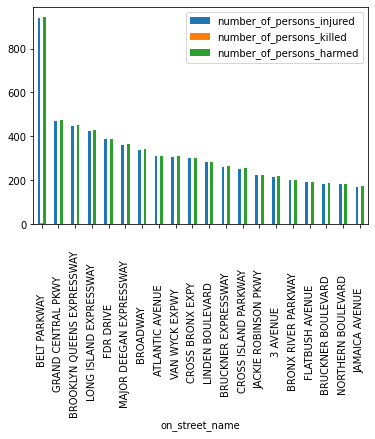

In [50]:
df_graph.plot(kind='bar')
plt.show()